In [2]:
%matplotlib inline

import sys
from pathlib import Path
from packaging import version
import sklearn
import matplotlib.pyplot as plt

# Check Python and library versions
assert sys.version_info >= (3, 7)
# check scikit-learn version
assert version.parse(sklearn.__version__) >= version.parse("1.0.1")

# Increase font size for plots
plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)


# Create the `images/training_linear_models` folder
IMAGES_PATH = Path() / "images" / "training_linear_models"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)


In [3]:
# show version numbers of libraries

# Python -> use platform and sys modules
import platform, sys
print(f"Python: {platform.platform()}, version: {sys.version[0:6]}")

# data science libraries
import numpy as np
import pandas as pd
import seaborn as sns
print(f"numpy: {np.__version__}")
print(f"pandas: {pd.__version__}")
print(f"seaborn: {sns.__version__}")

# plotting library
import matplotlib as mp
print(f"matplotlib: {mp.__version__}")

# ML-models library
import sklearn as sk
print(f"scikit-learn: {sk.__version__}")

# statistics library
import statsmodels
print(f"statsmodels: {statsmodels.__version__}")

Python: Windows-10-10.0.26100-SP0, version: 3.11.9
numpy: 2.3.4
pandas: 2.3.3
seaborn: 0.13.2
matplotlib: 3.10.7
scikit-learn: 1.7.2
statsmodels: 0.14.5


## Voorbeeld Polynomial regression

Niet alle relaties zijn lineair, zoals volgende figuur aangeeft:

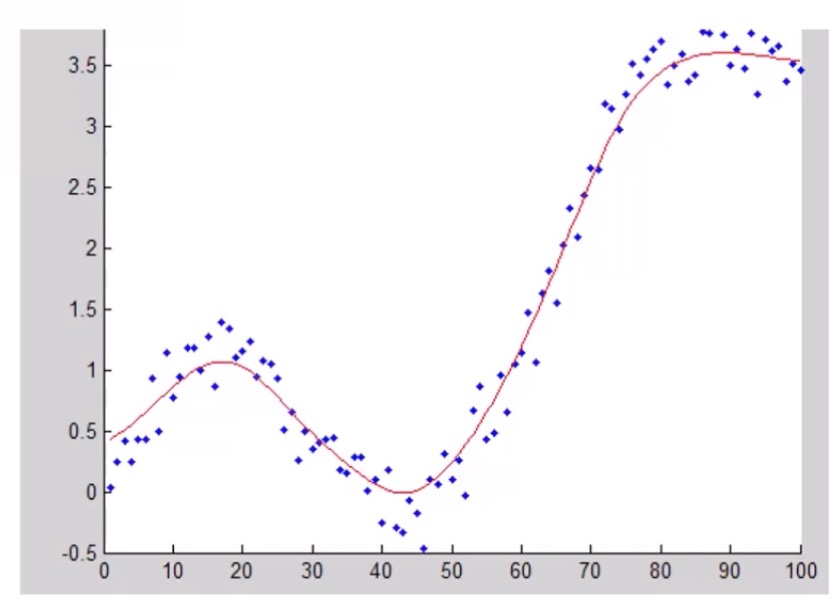

Dat kan leiden tot 2e graads polynoom, 3e graads polynoom, etc.
- y = ax<sup>2</sup> + bx +c
- y = ax<sup>3</sup> + bx<sup>2</sup> + cx + d
- etc. hoe groter de graad van een polynoom is, des complexer de figuur.

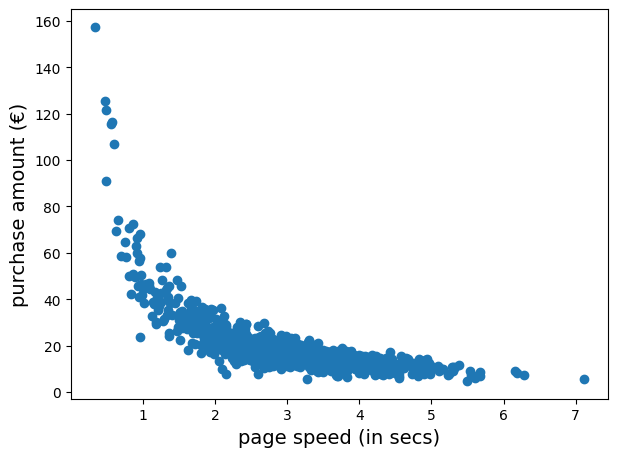

In [4]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

np.random.seed(2)
pageSpeeds = np.random.normal(3.0, 1.0, 1000)  # test data
# generate non-linear data
purchaseAmount = np.random.normal(50.0, 10.0, 1000) / pageSpeeds

# make a plot to visualize test data
plt.xlabel("page speed (in secs)")
plt.ylabel("purchase amount (€)")

plt.scatter(pageSpeeds, purchaseAmount)
save_fig("Pagespeed-polynomial-scatterplot")

plt.show()

`numpy` heeft een handige `polyfit` methode, die we kunnen gebruiken, om een n-de-graads polynoommodel van onze gegevens te  construeren dat de kwadratische fout minimaliseert. Laten we het proberen met een 4e graads polynoom:

In [5]:
X = np.array(pageSpeeds)
y = np.array(purchaseAmount)

p4 = np.poly1d(np.polyfit(X, y, 4))

Visualiseer de originele scatterplot samen met de voorspelde waarden met behulp van een n-de graads polynoom voor paginasnelheidstijden variërend van 0-7 seconden:

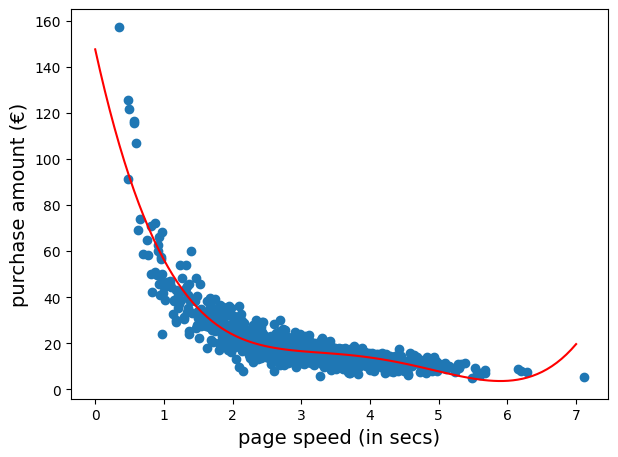

In [6]:
# generate 100 data between 0 and 7
xp = np.linspace(0, 7, 100)

# specify the labels along the axis
plt.xlabel("page speed (in secs)")
plt.ylabel("purchase amount (€)")

# make a scatterplot of test data and polynomial fit
plt.scatter(X, y)
plt.plot(xp, p4(xp), c='r')

save_fig("Pagespeed-polynomial-p4")
plt.show()

Ziet er best goed uit! Laten we de R<sup>2</sup>-fout meten:

In [7]:
from sklearn.metrics import r2_score

r2 = r2_score(y, p4(X))

print(r2)

0.8293766396303073


## Opdracht - polynominal regression

Probeer verschillende graads-polynomen. Kun je een betere pasvorm krijgen? Begin je overfitting te zien, ook al ziet de R<sup>2</sup>score er goed uit voor deze specifieke dataset?

In [8]:
# hier komt jouw code

# Tip: bekijk bovenstaande code waar de 
# polynoom-graad voorkomt, en bedenk hoe je 
# dat kan generaliseren (software engineering!)
# zodat je met slechts één coderegel 
# verschillende polynomen met argument order
# kan laten uitvoeren.



Experiments:

| order | R<sup>2</sup>|  |
|-------| ------|----|
|   1   | 0.50 |
|   2   | 0.69 |
|   3   | 0.78 |
|   4   | 0.83 |
|   5   | 0.86 |
|   6   | 0.87 | start overfitting |
|  10   | 0.88 |
|  15   | 0.88 |
|  17   | 0.88 | RankWarning: Polyfit may be poorly conditioned |


## Samenvatting

1. Let op overfitting, want het model is dan **te goed** op de data ingesteld. We hebben ook **alle data** gebruikt om te trainen!
2. Visualiseer eerst je data om te zien hoe complex een aan-te-passen-lijn werkelijk kan zijn.
3. Een hoge waarde voor R<sup>2</sup> betekent dat je aan-te-passen-lijn goed bij je *training data* past, maar het is misschien géén goede voorspeller.
4. Een principiëlere manier om overfitting te detecteren is splitsen data in training en test data.